In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

> ## Numerical Categories 

## Mask
* `0`: Wear
* `1`: Incorrect
* `2`: Not Wear

## Gender

* `0`: male
* `1`: female

## Age

* `<30`: 0
* `>=30 and <60`: 1
* `>=60`: 2

> ## Data Directory Path

In [9]:
os.getcwd()

'/Users/jasonlee/Desktop/AI_STUDY/PStage/data'

In [10]:
DATA_DIR = './train/images'

> ## Load train.csv

In [11]:
df = pd.read_csv('./train/train.csv')
df

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59
...,...,...,...,...,...
2695,006954,male,Asian,19,006954_male_Asian_19
2696,006955,male,Asian,19,006955_male_Asian_19
2697,006956,male,Asian,19,006956_male_Asian_19
2698,006957,male,Asian,20,006957_male_Asian_20


> ## Functions that convert to numeric category according to the labels

In [12]:
def get_gender(gender):
    return 0 if gender=='male' else 1

def get_age(age):
    label = None
    if age < 30:
        label = 0
    elif age >= 30 and age < 60:
        label = 1
    else:
        label = 2
    
    return label

def get_mask(fname):
    label = None
    if fname.startswith('mask'):
        label = 0
    elif fname.startswith('incorrect'):
        label = 1
    elif fname.startswith('normal'):
        label = 2
    
    return label

> ## Combine three labels into one final label (0~17)

In [13]:
label = 0
label_trsfm = {}

for m in range(3):
    for g in range(2):
        for a in range(3):
            label_trsfm[':'.join([str(m),str(g),str(a)])] = label
            label += 1

In [14]:
label_trsfm

{'0:0:0': 0,
 '0:0:1': 1,
 '0:0:2': 2,
 '0:1:0': 3,
 '0:1:1': 4,
 '0:1:2': 5,
 '1:0:0': 6,
 '1:0:1': 7,
 '1:0:2': 8,
 '1:1:0': 9,
 '1:1:1': 10,
 '1:1:2': 11,
 '2:0:0': 12,
 '2:0:1': 13,
 '2:0:2': 14,
 '2:1:0': 15,
 '2:1:1': 16,
 '2:1:2': 17}

> ## Convert to dataframe with appropriate categories
* `mask`, `gender`, `age`

In [15]:
converted_df = pd.DataFrame(columns=['id','gender','age','mask','path'])

In [16]:
cnt = 0

for row_idx in range(len(df)):
    row = df.iloc[row_idx]
    person_dir_full_path = os.path.join(DATA_DIR, row['path'])
    person_dir_name = row['path']
    person_id = row['id']
    person_gender = row['gender']
    person_age = row['age']

    
    for fname in os.listdir(person_dir_full_path):
        data_path = os.path.join(person_dir_name, fname)

        converted_df.loc[cnt] = [
            person_id,
            get_gender(person_gender),
            get_age(person_age),
            get_mask(fname),
            data_path
        ]
        cnt += 1

In [19]:
converted_df

,id,gender,age,mask,path
0,000001,1,1,1,000001_female_Asian_45/incorrect_mask.jpg
1,000001,1,1,0,000001_female_Asian_45/mask4.jpg
2,000001,1,1,0,000001_female_Asian_45/mask5.jpg
3,000001,1,1,0,000001_female_Asian_45/mask1.jpg
4,000001,1,1,2,000001_female_Asian_45/normal.jpg
...,...,...,...,...,...
18895,006959,0,0,0,006959_male_Asian_19/mask5.jpg
18896,006959,0,0,0,006959_male_Asian_19/mask1.jpg
18897,006959,0,0,2,006959_male_Asian_19/normal.jpg
18898,006959,0,0,0,006959_male_Asian_19/mask2.jpg


In [18]:
converted_df.to_csv('three_labels.csv')

> ## EDA: Visualizations

## Gender

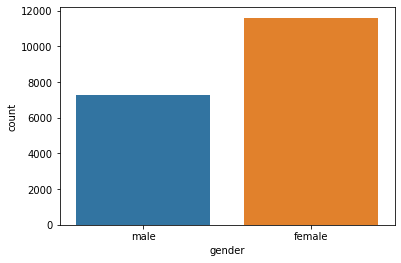

In [151]:
sns.countplot(data=converted_df, x='gender')
plt.xticks([0,1],['male','female'])
plt.show()

## Age

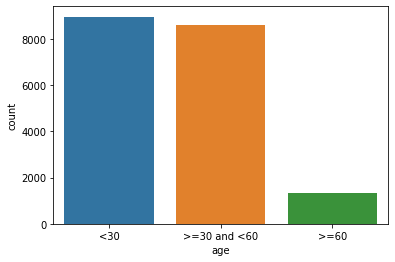

In [152]:
sns.countplot(data=converted_df, x='age')
plt.xticks([0,1,2],['<30','>=30 and <60', '>=60'])
plt.show()

## Mask

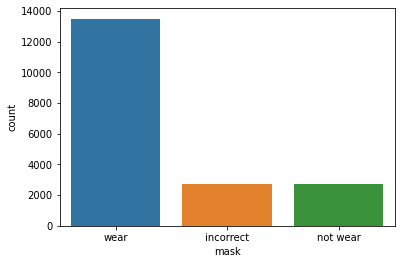

In [153]:
sns.countplot(data=converted_df, x='mask')
plt.xticks([0,1,2],['wear','incorrect','not wear'])
plt.show()

> ## Convert to Data-Label format dataframe for training

In [154]:
label_col = []

for row_idx in range(len(converted_df)):
    row = new_df.iloc[row_idx]
    gender = row['gender']
    age = row['age']
    mask = row['mask']
    
    label_col.append(label_trsfm[":".join([str(mask),str(gender),str(age)])])
    
converted_df['label'] = label_col

In [155]:
data_label_df = converted_df.drop(['gender','age','mask','id'], axis=1)
data_label_df

,path,label
0,000001_female_Asian_45/incorrect_mask.jpg,10
1,000001_female_Asian_45/mask4.jpg,4
2,000001_female_Asian_45/mask5.jpg,4
3,000001_female_Asian_45/mask1.jpg,4
4,000001_female_Asian_45/normal.jpg,16
...,...,...
18895,006959_male_Asian_19/mask5.jpg,0
18896,006959_male_Asian_19/mask1.jpg,0
18897,006959_male_Asian_19/normal.jpg,12
18898,006959_male_Asian_19/mask2.jpg,0


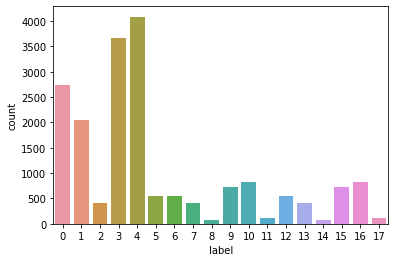

In [158]:
sns.countplot(data=data_label_df, x='label')
plt.show()

> ## Save final dataframe to .csv file

In [156]:
data_label_df.to_csv('train_data_label.csv')